# CMPE 257 - Assignment 3 - Fractal Clustering

Student Name : Darshini Venkatesha Murthy Nag  
Team Name : Code Wizards  
SJSU ID : 016668951  

Objective: To offer insights for prospective investors and home buyers to determine the viability of investing in California real estate.

Datasets: California Real Estate datasets available inside shared drive data folder https://drive.google.com/drive/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-?usp=drive_link

**To find a Golden cluster and using Fractal Clustering** based on the business case.


# Objective Functions

**Objective Function 1:** Selling Price and Property Crime Rate

Goal: To Identify clusters with low property crime rates and affordable moderate housing prices, attractive to potential investors.

Criteria:
*   Minimizing the average property crime rate within each cluster.
*   Minimizing the average selling price within each cluster.

**Objective Function 2:** Walk Score and Selling Price

Goal: To Identify clusters that offer a high walkability score along with moderate selling prices.

Criteria:

*   Maximizing the average Walk Score within each cluster.
*   Minimizing the average selling price within each cluster.


# Data Narrative

Data Narrative
Main dataset is downloaded from redfin and is uploaded in the shared drive : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

Scrapped data is obtained from the following websites

Walk Score is from : https://www.walkscore.com/

Total crime rate , Property crime rate: https://247wallst.com/state/crime-in-california/

School Rating : https://www.niche.com/places-to-live/z/95134/

Final dataset is located at: https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

The dataset contains the following columns

SALE TYPE: Indicates the type of sales transaction. This includes categories such as new listings, resale, foreclosure, etc.

SOLD DATE: The date on which the property was sold.

PROPERTY TYPE: This column categorizes the properties into various types such as single-family homes, apartments, condos, etc.

ADDRESS: The address where the property is located.

CITY: The city where the property is located.

STATE OR PROVINCE: The state or province where the property is located.

ZIP_CODE: Indicates the zip code of the property's location.

PRICE: Indicates the selling price of the property.

BEDS: Indicates the number of bedrooms in the property.

BATHS: The number of bathrooms in the property.

SOURCE: The source from where the data was obtained.

MLS#: The Multiple Listing Service number, serves as an identifier for the property listing.

FAVORITE: Indicates whether the property was marked as a favorite, possibly by potential buyers or real estate agents.

INTERESTED: Indicates the level of interest or the number of interested parties for a particular property.

LATITUDE & LONGITUDE: provides the geographical coordinates of the property.

WALK_SCORE: A score indicating the walkability of the neighborhood where the property is located.

PROPERTY_CRIME: Indicates the rate of property crimes in the city where the where the property is located.

TOTAL_CRIME: Indicates the rate of total crimes in the city where the where the property is located.

SCHOOL_RANKING: Provides information about the ranking of schools nearby the property

In [ ]:
## Standard Imports
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
import seaborn as sns

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# id of the dataset final scrapped csv file in the google drive shared folder

id='18cvJIqzfhTSrV53TJZruhYEVNO47b_b5'
print (id)

18cvJIqzfhTSrV53TJZruhYEVNO47b_b5


In [ ]:
## Loading Dataset

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('RF_Housingdata_final.csv')
data = pd.read_csv('RF_Housingdata_final.csv')
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,...,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING
0,MLS Listing,NaN,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038381,N,Y,37.817373,-122.254688,84,6421,7692,712.0
1,MLS Listing,NaN,Single Family Residential,5450 Proctor Ave,Oakland,CA,94618,1075000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038260,N,Y,37.835305,-122.221226,30,6421,7692,582.0
2,MLS Listing,NaN,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41037668,N,Y,37.835468,-122.276067,90,21187,22528,NaN
3,MLS Listing,NaN,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038165,N,Y,37.814753,-122.255872,84,6421,7692,712.0
4,MLS Listing,NaN,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038131,N,Y,37.820653,-122.249832,86,6421,7692,564.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 31 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    4042 non-null   object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                4042 non-null   object 
 3   ADDRESS                                                                                      4031 non-null   object 
 4   CITY                                                                                         4042 non-null   object 
 5   STATE OR PROVINCE                 

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SOLD DATE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP_CODE,4042.0,9.446043e+04,1.396650e+03,9131.000000,94112.000000,9.453800e+04,9.461100e+04,9.514800e+04
PRICE,4042.0,1.818371e+06,2.344222e+06,39995.000000,799000.000000,1.279495e+06,1.950000e+06,4.200000e+07
BEDS,3901.0,3.150987e+00,2.237906e+00,0.000000,2.000000,3.000000e+00,4.000000e+00,5.600000e+01
BATHS,3807.0,2.497505e+00,1.818428e+00,0.500000,2.000000,2.000000e+00,3.000000e+00,4.950000e+01
SQUARE FEET,3854.0,2.177032e+03,2.371299e+03,254.000000,1140.250000,1.590000e+03,2.421500e+03,5.300000e+04
LOT SIZE,3173.0,1.604672e+05,5.347448e+06,436.000000,3000.000000,5.605000e+03,1.000100e+04,2.688088e+08
YEAR BUILT,3672.0,1.964365e+03,3.758494e+01,1870.000000,1931.000000,1.965000e+03,1.997000e+03,2.024000e+03
DAYS ON MARKET,3895.0,5.614326e+01,8.359356e+01,1.000000,8.000000,2.800000e+01,7.100000e+01,1.040000e+03
$/SQUARE FEET,3854.0,8.502976e+02,4.527999e+02,85.000000,577.000000,7.700000e+02,1.025000e+03,6.851000e+03


In [ ]:
# Data Cleaning

# Drop column sold date as it doesn't have any values
data.drop(axis=1, labels='SOLD DATE', inplace=True)

print(data.isnull().sum()) #features having the null value

SALE TYPE                                                                                         0
PROPERTY TYPE                                                                                     0
ADDRESS                                                                                          11
CITY                                                                                              0
STATE OR PROVINCE                                                                                 0
ZIP_CODE                                                                                          0
PRICE                                                                                             0
BEDS                                                                                            141
BATHS                                                                                           235
LOCATION                                                                                          3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 30 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    4042 non-null   object 
 1   PROPERTY TYPE                                                                                4042 non-null   object 
 2   ADDRESS                                                                                      4031 non-null   object 
 3   CITY                                                                                         4042 non-null   object 
 4   STATE OR PROVINCE                                                                            4042 non-null   object 
 5   ZIP_CODE                          

#***Possible Latent Variables***  
Price   
$ / Square feet  
School Proximity Rank    
Walk Score  
Crime Rate

# Performing Fractal Clustering on Latent Variables

Fractal Clustering is performed using recursive k-means

# Price Vs Property Crime Rate

In [ ]:
def plot_cluster(data, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        data.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = data.iloc[:,[6,27]]

    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

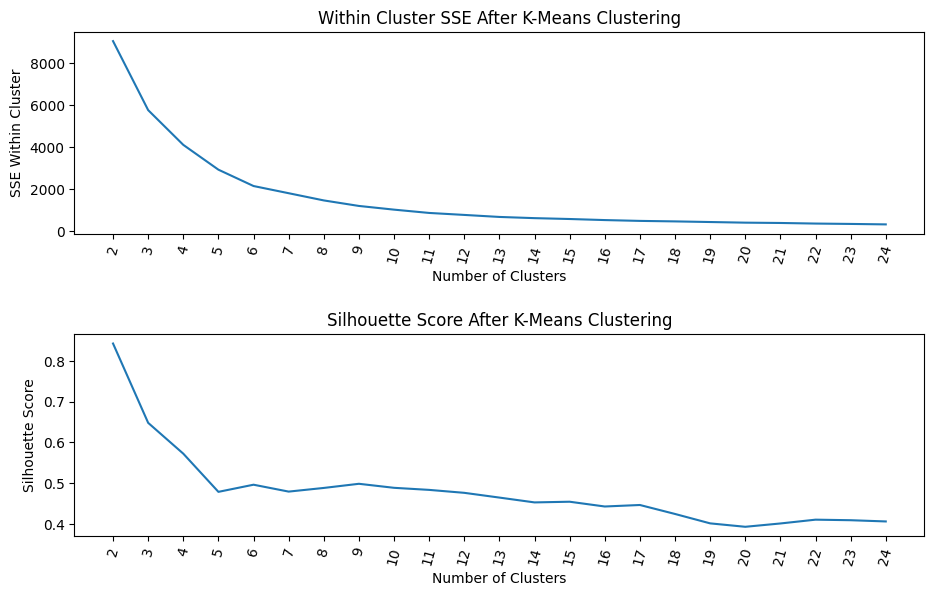

In [ ]:
plot_cluster(data, max_loop=25)

**First Trial**

In [ ]:
def apply_cluster(data, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        data.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = data.iloc[:,[6,27]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)
    kmeans.fit(X_rb)
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    data['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_

    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(round(score, 2)))
    print("sse within cluster: " + str(round(sse_within_cluster)))

    return data

In [ ]:
first_trial = apply_cluster(data, clusters=6)

clustering performance
-----------------------------------
silhouette score: 0.5
sse within cluster: 2137


In [ ]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"PRICE":"mean", "PROPERTY_CRIME":"mean"})
    .sort_values('PROPERTY_CRIME')
    .reset_index()
)

cluster_perf_df

,cluster,PRICE,PROPERTY_CRIME
0,3,1.188939e+06,2359.793762
1,2,3.342714e+07,3231.857143
2,4,1.505747e+07,3723.210526
3,0,3.185238e+06,3766.020067
4,5,7.129549e+06,3845.712230
5,1,1.053926e+06,5928.776199


Selecting Cluster 3 as it has the least property crime rate

In [ ]:
df_sub = first_trial.query("cluster == 3").reset_index(drop=True)
df_sub

,SALE TYPE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,...,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING,cluster
0,MLS Listing,Single Family Residential,1074 Annerley Rd,Piedmont,CA,94610,1075000,3.0,1.0,Piedmont,...,41038295,N,Y,37.816725,-122.234318,63,2008,2131,712.0,3
1,New Construction Plan,Condo/Co-op,Plan 4,Alameda,CA,94501,992990,3.0,2.0,Landing at Bay37,...,Plan-241877083,N,Y,37.791442,-122.279678,54,3268,3474,93.0,3
2,New Construction Plan,Condo/Co-op,Plan 3,Alameda,CA,94501,975990,3.0,2.0,Landing at Bay37,...,Plan-241877082,N,Y,37.791442,-122.279678,54,3268,3474,93.0,3
3,New Construction Plan,Condo/Co-op,Plan 7,Alameda,CA,94501,1164990,3.0,2.5,Compass at Bay37,...,Plan-241877080,N,Y,37.791442,-122.279678,54,3268,3474,93.0,3
4,New Construction Plan,Condo/Co-op,Plan 6,Alameda,CA,94501,1115990,3.0,3.0,Compass at Bay37,...,Plan-241877079,N,Y,37.791442,-122.279678,54,3268,3474,93.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,MLS Listing,Townhouse,228 Sand Hill Cir,Menlo Park,CA,94025,2248888,4.0,2.5,MENLO PARK,...,ML81939608,N,Y,37.425187,-122.221632,15,2220,2363,NaN,3
1567,MLS Listing,Townhouse,442 Sand Hill Cir,Menlo Park,CA,94025,2098000,3.0,2.5,MENLO PARK,...,ML81937858,N,Y,37.424102,-122.222999,14,2220,2363,NaN,3
1568,MLS Listing,Single Family Residential,NaN,Menlo Park,CA,94025,1800000,3.0,1.0,MENLO PARK,...,ML81935894,N,Y,37.473869,-122.196887,54,2220,2363,NaN,3
1569,MLS Listing,Condo/Co-op,1202 Sharon Park Dr #71,Menlo Park,CA,94025,1540000,2.0,2.0,MENLO PARK,...,ML81934783,N,Y,37.426349,-122.216904,4,2220,2363,NaN,3


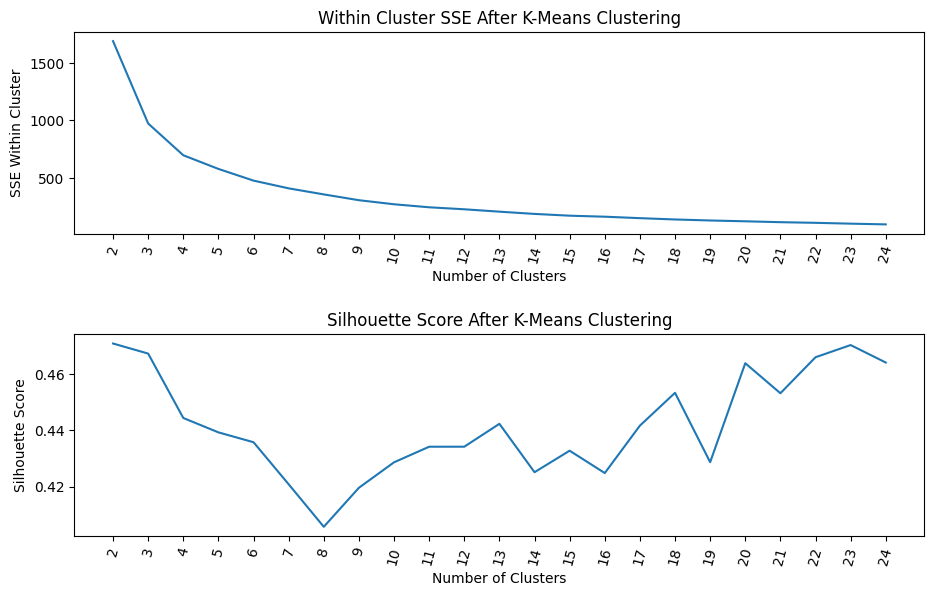

In [ ]:
plot_cluster(df_sub, max_loop=25)

**Second Trial**

In [ ]:
second_trial = apply_cluster(df_sub, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.47
sse within cluster: 973


In [ ]:
cluster_sub1_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"PRICE":"mean", "PROPERTY_CRIME":"mean"})
    .sort_values('PROPERTY_CRIME')
    .reset_index()
)

cluster_sub1_perf_df


,cluster,PRICE,PROPERTY_CRIME
0,0,1.308520e+06,1624.974425
1,1,1.173939e+06,2371.030445
2,2,1.084809e+06,3211.690184


Selecting Cluster 0 as it has the least property crime rate

**Golden Cluster**

In [ ]:
best_sub_cluster = second_trial.query("cluster == 0").reset_index(drop=True)
best_sub_cluster

,SALE TYPE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,...,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING,cluster
0,MLS Listing,Single Family Residential,253 Saint James Dr,Piedmont,CA,94611,2195000,4.0,3.5,St James Woods,...,41038377,N,Y,37.814562,-122.217546,50,2008,2131,564.0,0
1,MLS Listing,Multi-Family (2-4 Unit),85 Linda Ave,Piedmont,CA,94611,1550000,4.0,4.0,Piedmont,...,41037899,N,Y,37.825529,-122.248838,96,2008,2131,564.0,0
2,MLS Listing,Condo/Co-op,4716 Norris Canyon Rd #202,San Ramon,CA,94583,788000,3.0,2.0,San Ramon,...,41037423,N,Y,37.776444,-121.962731,57,1439,1515,69.0,0
3,MLS Listing,Single Family Residential,3478 Cinnamon Ridge Rd,San Ramon,CA,94582,2199900,4.0,4.5,Gale Ranch,...,41038313,N,Y,37.764565,-121.915152,11,1439,1515,40.0,0
4,MLS Listing,Condo/Co-op,3881 Crow Canyon Rd,San Ramon,CA,94582,725000,2.0,2.0,Cobblestone,...,41038019,N,Y,37.786067,-121.952335,14,1439,1515,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MLS Listing,Vacant Land,16968 Bohlman Rd,Saratoga,CA,95070,1195000,NaN,NaN,SARATOGA,...,ML81904990,N,Y,37.222125,-122.032711,0,783,835,NaN,0
387,MLS Listing,Vacant Land,0000 Congress Spgs,Saratoga,CA,95070,1600000,NaN,NaN,SARATOGA,...,ML81887461,N,Y,37.251971,-122.054378,5,783,835,NaN,0
388,MLS Listing,Single Family Residential,49070 Tomahawk Pl,Fremont,CA,94539,1650000,4.0,2.5,FREMONT,...,ML81940388,N,Y,37.461344,-121.911687,74,1878,2044,NaN,0
389,MLS Listing,Single Family Residential,340 Nimitz Ave,Redwood City,CA,94061,1495000,2.0,1.0,REDWOOD CITY,...,ML81939339,N,Y,37.456196,-122.221831,57,1536,1752,NaN,0


# Price vs Walkscore

In [ ]:
def plot_cluster_price_walkscore(data, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        data.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = data.iloc[:,[6,26]]

    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

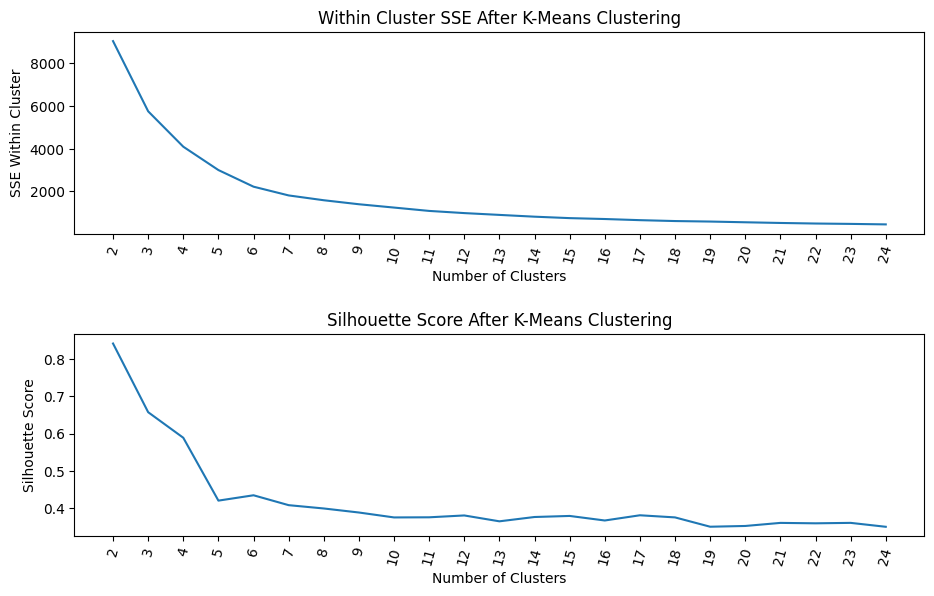

In [ ]:
plot_cluster_price_walkscore(data, max_loop=25)

**First Trial**

In [ ]:
def apply_cluster_new(data, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        data.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = data.iloc[:,[6,26]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)
    kmeans.fit(X_rb)
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    data['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_

    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(round(score, 2)))
    print("sse within cluster: " + str(round(sse_within_cluster)))

    return data

In [ ]:
firstTrial = apply_cluster_new(data, clusters=4)

clustering performance
-----------------------------------
silhouette score: 0.59
sse within cluster: 4094


In [ ]:
cluster_sub_df = (
    firstTrial
    .groupby('cluster')
    .agg({"PRICE":"mean", "WALK_SCORE":"mean"})
    .sort_values('WALK_SCORE')
    .reset_index()
)

cluster_sub_df

,cluster,PRICE,WALK_SCORE
0,1,3.342714e+07,60.428571
1,2,1.252098e+07,65.642857
2,3,4.244607e+06,67.409563
3,0,1.204863e+06,68.618255


Selecting Cluster 0 as it has the highest walkscore

In [ ]:
data_sub = firstTrial.query("cluster == 0").reset_index(drop=True)
data_sub

,SALE TYPE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,...,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING,cluster
0,MLS Listing,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000,1.0,1.0,Adams Point,...,41038381,N,Y,37.817373,-122.254688,84,6421,7692,712.0,0
1,MLS Listing,Single Family Residential,5450 Proctor Ave,Oakland,CA,94618,1075000,1.0,1.0,Upper Rockridge,...,41038260,N,Y,37.835305,-122.221226,30,6421,7692,582.0,0
2,MLS Listing,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000,1.0,1.0,Emeryville Bordr,...,41037668,N,Y,37.835468,-122.276067,90,21187,22528,NaN,0
3,MLS Listing,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000,1.0,1.0,Adams Point,...,41038165,N,Y,37.814753,-122.255872,84,6421,7692,712.0,0
4,MLS Listing,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000,1.0,1.0,Rose Garden,...,41038131,N,Y,37.820653,-122.249832,86,6421,7692,564.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,MLS Listing,Townhouse,442 Sand Hill Cir,Menlo Park,CA,94025,2098000,3.0,2.5,MENLO PARK,...,ML81937858,N,Y,37.424102,-122.222999,14,2220,2363,NaN,0
3480,MLS Listing,Single Family Residential,544 Encina Ave,Menlo Park,CA,94025,2295000,3.0,2.0,MENLO PARK,...,ML81935895,N,Y,37.473777,-122.196555,58,2220,2363,NaN,0
3481,MLS Listing,Single Family Residential,NaN,Menlo Park,CA,94025,1800000,3.0,1.0,MENLO PARK,...,ML81935894,N,Y,37.473869,-122.196887,54,2220,2363,NaN,0
3482,MLS Listing,Condo/Co-op,1202 Sharon Park Dr #71,Menlo Park,CA,94025,1540000,2.0,2.0,MENLO PARK,...,ML81934783,N,Y,37.426349,-122.216904,4,2220,2363,NaN,0


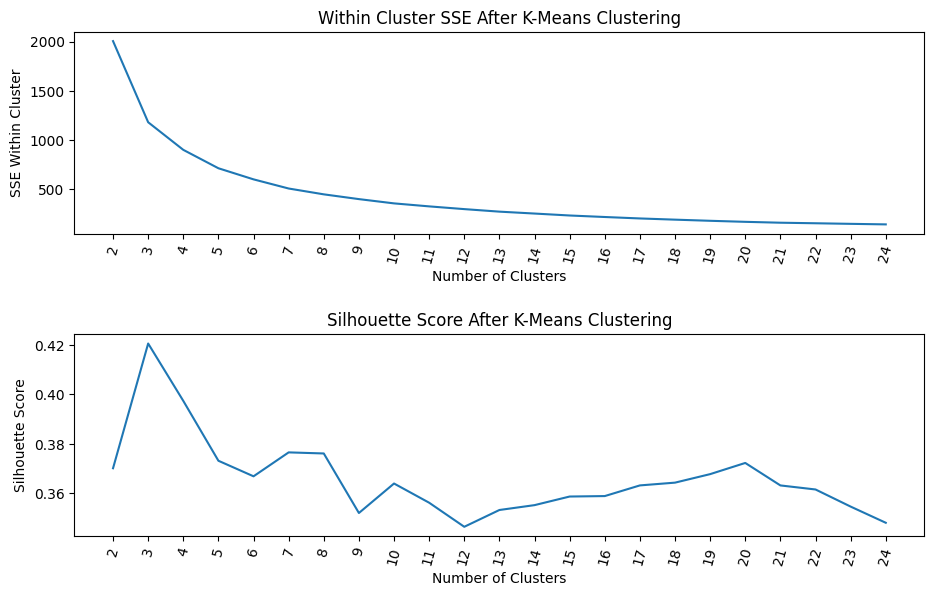

In [ ]:
plot_cluster_price_walkscore(data_sub, max_loop=25)

**Second Trial**

In [ ]:
secondTrial = apply_cluster_new(data_sub, clusters=4)

clustering performance
-----------------------------------
silhouette score: 0.4
sse within cluster: 899


In [ ]:
cluster_sub1_df = (
    secondTrial
    .groupby('cluster')
    .agg({"PRICE":"mean", "WALK_SCORE":"mean"})
    .sort_values('WALK_SCORE')
    .reset_index()
)

cluster_sub1_df

,cluster,PRICE,WALK_SCORE
0,1,1.751840e+06,29.943089
1,3,7.836988e+05,39.517665
2,0,1.835247e+06,84.107987
3,2,8.223931e+05,85.286501


Selecting Cluster 2 as it has the highest walkscore

In [ ]:
data_sub2 = secondTrial.query("cluster == 2").reset_index(drop=True)
data_sub2


,SALE TYPE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,...,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING,cluster
0,MLS Listing,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000,1.0,1.0,Adams Point,...,41038381,N,Y,37.817373,-122.254688,84,6421,7692,712.0,2
1,MLS Listing,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000,1.0,1.0,Emeryville Bordr,...,41037668,N,Y,37.835468,-122.276067,90,21187,22528,NaN,2
2,MLS Listing,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000,1.0,1.0,Adams Point,...,41038165,N,Y,37.814753,-122.255872,84,6421,7692,712.0,2
3,MLS Listing,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000,1.0,1.0,Rose Garden,...,41038131,N,Y,37.820653,-122.249832,86,6421,7692,564.0,2
4,MLS Listing,Condo/Co-op,585 9Th St #305,Oakland,CA,94607,475000,1.0,1.0,Downtown,...,41038069,N,Y,37.801934,-122.276431,99,6421,7692,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,MLS Listing,Mobile/Manufactured Home,60 WILSON #55,Milpitas,CA,95035,420000,3.0,2.0,MILPITAS,...,ML81933804,N,Y,37.458385,-121.913997,83,2663,2787,NaN,2
1448,MLS Listing,Condo/Co-op,368 Rio Verde Pl #4,Milpitas,CA,95035,596000,2.0,1.0,MILPITAS,...,ML81930796,N,Y,37.424022,-121.911717,78,2663,2787,NaN,2
1449,MLS Listing,Mobile/Manufactured Home,60 Wilson Way #91,Milpitas,CA,95035,449900,3.0,2.0,MILPITAS,...,ML81927165,N,Y,37.458385,-121.913997,83,2663,2787,NaN,2
1450,MLS Listing,Mobile/Manufactured Home,1515 N Milpitas Blvd #36,Milpitas,CA,95035,329000,2.0,2.0,MILPITAS,...,ML81924691,N,Y,37.453417,-121.913486,75,2663,2787,NaN,2


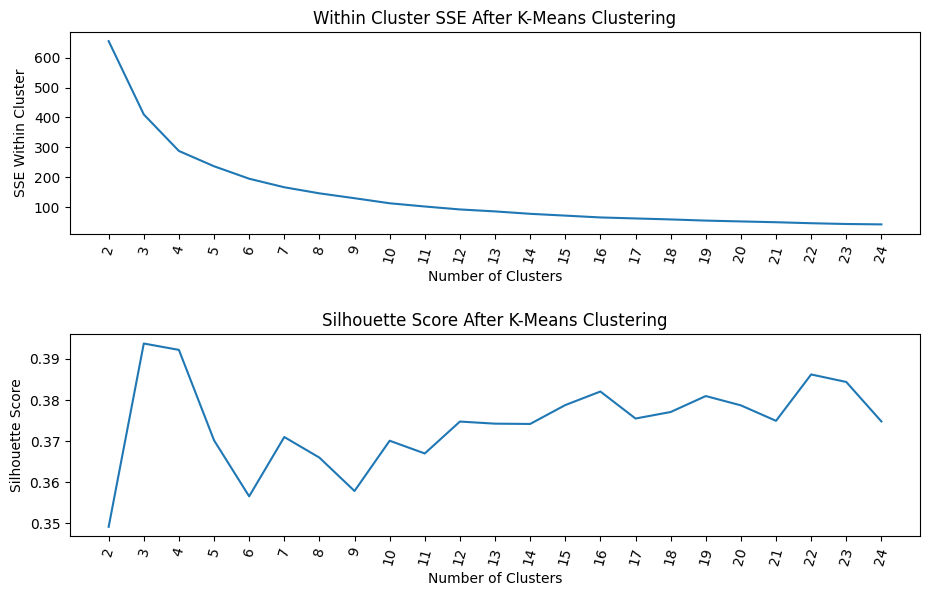

In [ ]:
plot_cluster_price_walkscore(data_sub2, max_loop=25)

**Third Trial**

In [ ]:
thirdTrial = apply_cluster_new(data_sub2, clusters=4)

clustering performance
-----------------------------------
silhouette score: 0.39
sse within cluster: 288


In [ ]:
cluster_sub2_df = (
    thirdTrial
    .groupby('cluster')
    .agg({"PRICE":"mean", "WALK_SCORE":"mean"})
    .sort_values('WALK_SCORE')
    .reset_index()
)

cluster_sub2_df

,cluster,PRICE,WALK_SCORE
0,3,1.025302e+06,73.631068
1,0,5.677020e+05,75.483384
2,2,1.087663e+06,92.791262
3,1,6.031743e+05,94.672500


Selecting the Cluster as 1 as it has the highest walkscore

**Golden Cluster**

In [ ]:
best_cluster = thirdTrial.query("cluster == 1").reset_index(drop=True)
best_cluster

,SALE TYPE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,...,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING,cluster
0,MLS Listing,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000,1.0,1.0,Emeryville Bordr,...,41037668,N,Y,37.835468,-122.276067,90,21187,22528,NaN,1
1,MLS Listing,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000,1.0,1.0,Rose Garden,...,41038131,N,Y,37.820653,-122.249832,86,6421,7692,564.0,1
2,MLS Listing,Condo/Co-op,585 9Th St #305,Oakland,CA,94607,475000,1.0,1.0,Downtown,...,41038069,N,Y,37.801934,-122.276431,99,6421,7692,NaN,1
3,MLS Listing,Condo/Co-op,850 W Grand Ave Unit B,Oakland,CA,94607,479000,1.0,1.0,Alameda County,...,41038005,N,Y,37.814190,-122.277152,92,6421,7692,NaN,1
4,MLS Listing,Condo/Co-op,2201 West St Unit B,Oakland,CA,94612,475000,1.0,1.0,West Oakland,...,41037397,N,Y,37.813040,-122.276434,92,6421,7692,760.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,MLS Listing,Condo/Co-op,1 Baldwin Ave #517,San Mateo,CA,94401,765000,2.0,2.0,SAN MATEO,...,ML81890463,N,Y,37.566479,-122.328046,95,2091,2342,NaN,1
396,MLS Listing,Condo/Co-op,1 Baldwin Ave #201,San Mateo,CA,94401,260000,1.0,1.0,SAN MATEO,...,ML81885059,N,Y,37.566479,-122.328046,95,2091,2342,NaN,1
397,MLS Listing,Condo/Co-op,1 Baldwin Ave #411,San Mateo,CA,94401,295000,2.0,2.0,SAN MATEO,...,ML81865679,N,Y,37.566479,-122.328046,95,2091,2342,NaN,1
398,MLS Listing,Condo/Co-op,1 Baldwin Ave #223,San Mateo,CA,94401,775000,2.0,2.0,SAN MATEO,...,ML81837483,N,Y,37.566479,-122.328046,95,2091,2342,NaN,1


# Conclusion

**Business Objective** :

*   To offer insights for prospective investors and home buyers to determine the viability of investing in California real estate.
*   This decision will be made by considering various features such as, Selling Price of the property, Proximity Ranking to various Schools, Crime Rate in the Area, Walk Score etc.

To suggest a suitable property for investors to invest on or not i have performed fractal clustering on some of the main important features. Below are the observations.

- ***Selling price and Maximum Walk Score***: Found that cluster 1 as the golden cluster having the maximum walk score for the moderate price.
- ***Selling price and Property Crime Rate***: Found that cluster 0 as the golden cluster having the lowest property crime rate and moderate housing prices that would interest the investor to invest in a property.




# References

Recursive K-Means : https://medium.com/uptick-blog/stock-picks-using-k-means-clustering-4330c6c4e8de